In [2]:
# Cindy Khuu
# Main Data: "Spotify Popularity & Audio Features"
# Main Data Source: Kaggle, Link: https://www.kaggle.com/tomigelo/spotify-audio-features#SpotifyAudioFeaturesApril2019.csv
# Supporting Data: Billboard Hot 100 Music Charts
# Supporting Data Source: https://www.billboard.com/charts/hot-100/2019-04-13
# Final Project 6/6/19

"""This program imports spotify dataset and creates a pandas dataframe called 
spotDF using additional data processing steps such as renaming column fields,
replacing missing values with the mean, and conforming string data type field 
artist_name and track_name using lowercase function. Then, summary statistics 
output, histogram charts, and correlation matrix heatmap are created for the 
spotDF dataframe. Next, it buckets the songs into different popularity types: 
popular, average, and less_popular based on the popularity score by adding new 
column to spotDF dataframe using a user-defined function. Then, it summarizes 
all the audio features for all the songs in the dataframe by popularity type. 

Next, it retrieves from the html link to the Billboard Hot 100 Music Chart 
website by searching for the defined tags, retrieves the artist name, song title, 
and rank on the charts into three separate lists, which is then combined into a 
pandas dataframe called billboarddf. Data cleansing occurs by attempting to 
conform artist name and song title to those in top 100 popular spotify songs, 
which was placed in a new dataframe, using lower case string function and manually 
replacing values. Then, it joins the top 100 popular spotify songs dataframe 
with the billboarddf, keeping all records of the top 100 popular spotify songs, 
and then writes output file. 

Finally, the program runs through three classification models using the 
y variable as the popularity attribute type and the x variables as the audio 
features and prints out the accuracy for each model. 
"""


# Import packages for pandas, numpy, beautful soup, matplotlib, seaborn, and sklearn
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
from sklearn import svm  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier


In [3]:
"""Defining User Functions"""


# Define function to attribute popularity score into very_popular for 76-100, popular for 51-75, somewhat popular for 26-50, and less popular for 0-25, 
# else make attribute "undefined"
def popularity_attribute(c):
    if c['popularity'] >= 50:
        return 'popular'
    elif c['popularity'] >= 25 and c['popularity'] < 50:
        return 'average'
    elif c['popularity'] < 25:
        return 'less_popular'
    else:
        return 'undefined'    

    
# Define a function to replace NaN (null values) with mean
def replaceNAwithmean(field_name):
    try:
        # For each field_name column in spotifydata dataframe, replace NaN (null values) with the mean for the field_name column
        spotDF[field_name]= spotDF[field_name].fillna(spotDF[field_name].mean())
    except:
        # If error, skip to the next field_name
        pass
        # Return value back to spotifydataframe
    return spotDF[field_name]


# Defining function with specific set of column fields and mathmatical functions to run to use with groupby operation
aggregations1 ={
        # find the count of track names 
        'track_name': ['count'],
        # find the mean of acousticness 
        'acousticness': ['mean'],
        # find the mean of danceability 
        'danceability': ['mean'],
        # find the mean of loudness 
        'loudness': ['mean'],
        # find the mean of valence 
        'valence': ['mean'],
        # find the mean of energy 
        'energy': ['mean'],
        # find the mean of duration_ms 
        'duration_ms': ['mean'],
        # find the mean of key 
        'key': ['mean'],
        # find the mean of instrumental 
        'instrumentalness': ['mean'],
        # find the mean of speechiness 
        'speechiness': ['mean'],
        # find the mean of liveness 
        'liveness': ['mean'],
        # find the mean of tempo 
        'tempo': ['mean'],
        # find the mean of time_signature 
        'time_signature': ['mean'],
        # find the mean of mode 
        'mode': ['mean']
    }

In [4]:
# Load data from csv file into a dataframe
spotDF = pd.DataFrame.from_csv('SpotifyAudioFeaturesApril2019.csv')

# Preview dataframe
spotDF

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
artist_name,,,,,,,,,,,,,,,,
YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0


In [5]:
"""Data Processing & Cleansing"""


# Create list of column names 
fieldlist = list(spotDF)
print ("This is my field list", fieldlist)

# Execute replaceNAwith user defined function to replace each item on fieldlist with mean of that item
for item in fieldlist:
    replaceNAwithmean (item)

# Reset spotDF index
spotDF =spotDF.reset_index()
# Drop track_id from spotDF
spotDF = spotDF.drop('track_id', 1)

# Convert all string text into lower case for consistency in values
spotDF['track_name']= spotDF['track_name'].str.lower()
spotDF['artist_name']= spotDF['artist_name'].str.lower()


This is my field list ['track_id', 'track_name', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']


In [6]:
# Preview dataframe changes
spotDF 

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,yg,"big bank feat. 2 chainz, big sean, nicki minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,yg,band drum (feat. a$ap rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,r3hab,radio silence,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,chris cooq,lactose,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,chris cooq,same - original mix,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
5,curbo,debauchery - original mix,0.001150,0.810,124016,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
6,bingo play,grandma - original mix,0.000539,0.819,132742,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
7,g herbo,bon appétit,0.115000,0.885,181838,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,34 feet,among - original mix,0.000058,0.740,124016,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
9,chris cooq,hazard - original mix,0.000081,0.813,132742,0.731,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0


In [7]:
# How many rows in the dataset
numrecords= spotDF['track_name'].count()
print('There are', numrecords, 'of music tracks in the dataset')

There are 130663 of music tracks in the dataset


In [8]:
""" Summary Statistics"""
# Review summary statistics of numerical variables
summaryDF =spotDF.describe()
summaryDF

# Write outputs to csv files using comma delimiter 
summaryDF.to_csv('spotify_summaryDF.csv', sep=',')

In [9]:
"""Create histgorams of the audio features and popularity score"""
# Create new spotify dataframe for visualization usage
spotDFviz= spotDF.copy()
spotDFviz

# Remove non- numerical columns from correlation data
spotDFviz.drop(spotDFviz.columns[:2],axis=1,inplace=True)
spotDFviz

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
5,0.001150,0.810,124016,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
6,0.000539,0.819,132742,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
7,0.115000,0.885,181838,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,0.000058,0.740,124016,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
9,0.000081,0.813,132742,0.731,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0


Text(0, 0.5, 'Frequency')

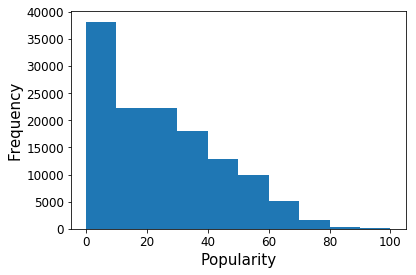

In [10]:
# Create histogram for popularity score
spotDFviz['popularity'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Popularity", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

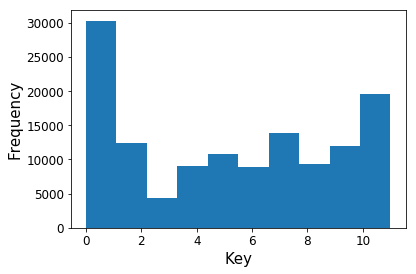

In [11]:
# Create histogram for key
spotDFviz['key'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Key", fontsize=15)
plt.ylabel("Frequency",fontsize=15)



Text(0, 0.5, 'Frequency')

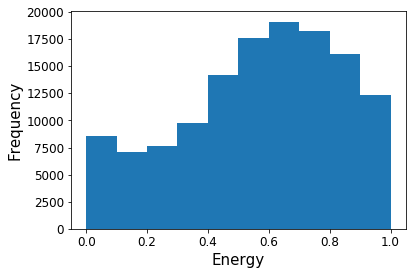

In [12]:
# Create histogram for energy
spotDFviz['energy'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Energy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

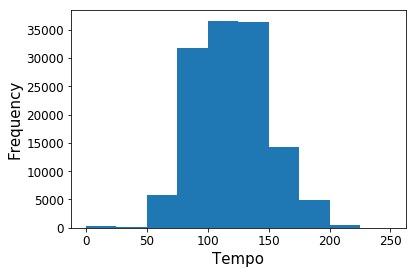

In [13]:
# Create histogram for tempo
spotDFviz['tempo'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Tempo", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency')

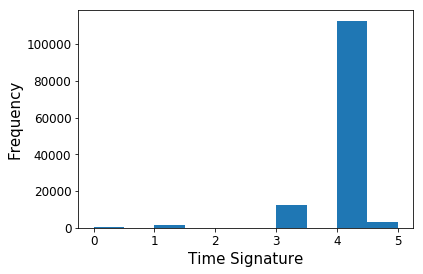

In [14]:
# Create histogram for time signature
spotDFviz['time_signature'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Time Signature", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

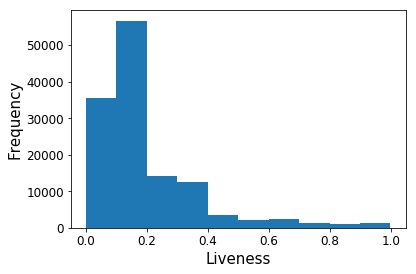

In [15]:
# Create histogram for liveness
spotDFviz['liveness'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Liveness", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

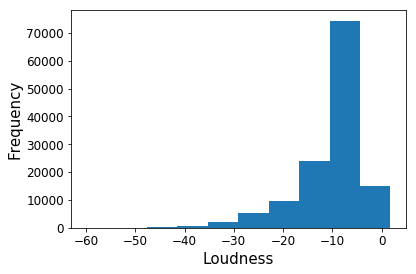

In [16]:
# Create histogram for loudness
spotDFviz['loudness'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Loudness", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

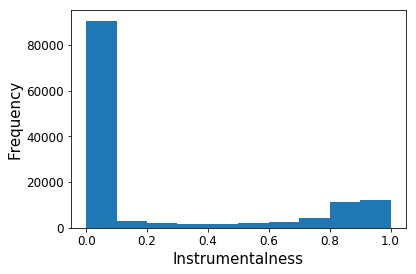

In [17]:
# Create histogram for instrumentalness
spotDFviz['instrumentalness'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Instrumentalness", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

Text(0, 0.5, 'Frequency')

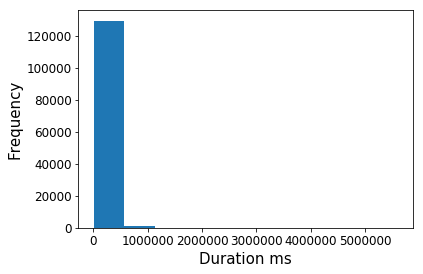

In [18]:
# Create histogram for durations_ms
spotDFviz['duration_ms'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Duration ms", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

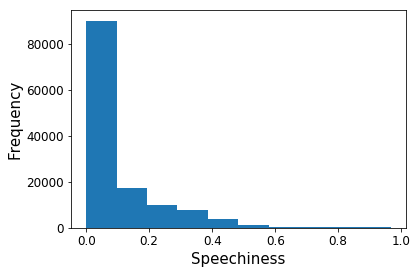

In [19]:
# Create histogram for speechiness
spotDFviz['speechiness'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Speechiness", fontsize=15)
plt.ylabel("Frequency",fontsize=15)



Text(0, 0.5, 'Frequency')

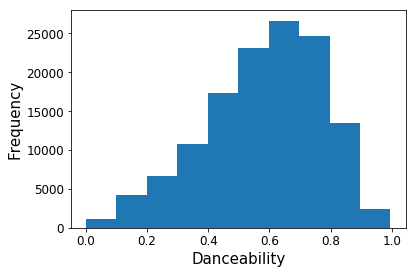

In [20]:
# Create histogram for danceability
spotDFviz['danceability'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Danceability", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


Text(0, 0.5, 'Frequency')

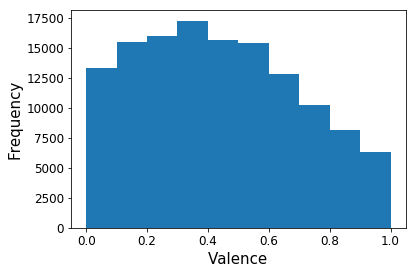

In [21]:
# Create histogram for valence
spotDFviz['valence'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Valence", fontsize=15)
plt.ylabel("Frequency",fontsize=15)



Text(0, 0.5, 'Frequency')

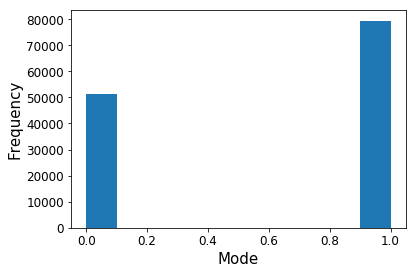

In [22]:
# Create histogram for mode
spotDFviz['mode'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Mode", fontsize=15)
plt.ylabel("Frequency",fontsize=15)



Text(0, 0.5, 'Frequency')

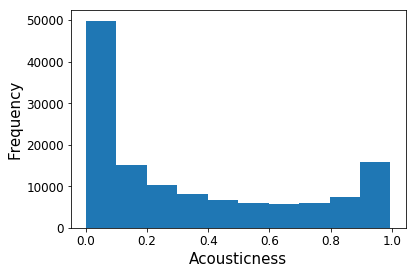

In [23]:
# Create histogram for mode
spotDFviz['acousticness'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Acousticness", fontsize=15)
plt.ylabel("Frequency",fontsize=15)




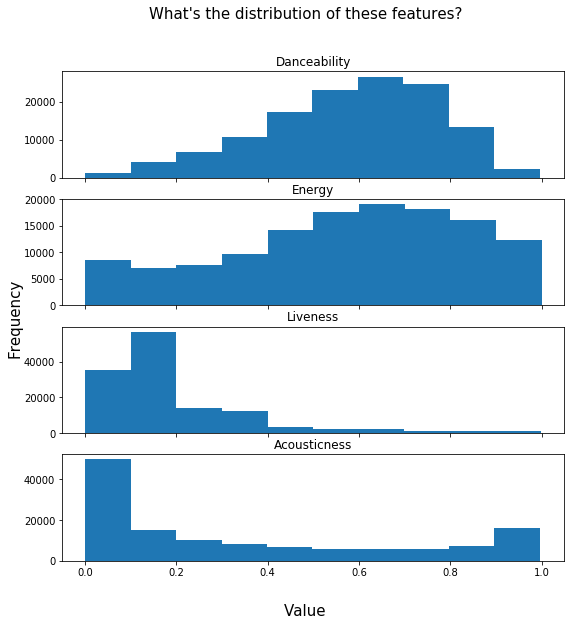

In [24]:
# Create histogram facet chart of features of interest
fig, axs = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
fig.text(0.5, 0.04, 'Value', ha='center',size=15)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical',size=15)
axs[0].hist(spotDFviz['danceability'])
axs[0].set_title('Danceability')
axs[1].hist(spotDFviz['energy'])
axs[1].set_title('Energy')
axs[2].hist(spotDFviz['liveness'])
axs[2].set_title('Liveness')
axs[3].hist(spotDFviz['acousticness'])
axs[3].set_title('Acousticness')
fig.suptitle("What's the distribution of these features?",size=15)
plt.show()

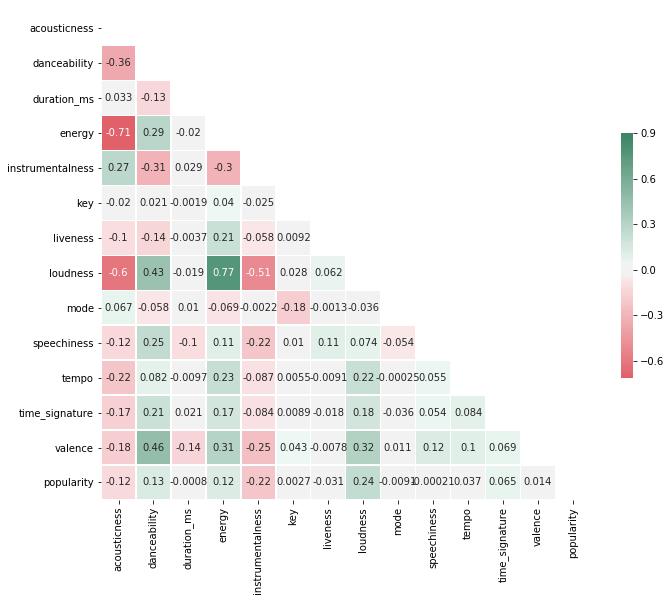

In [25]:
"""Create correlation matrix heatmap of the audio features and popularity score"""

# Compute the correlation matrix
corr = spotDFviz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [26]:
"""Create dataframe for top 100 popular songs from spotDF by sorting in descending order the field popularity"""

# Sort spotDF by popularity score
sortspotify = spotDF.sort_values(by='popularity', ascending =0)

# Take first 100 rows for the top 100 popular spotify songs
top100spotify = sortspotify[:100]


In [27]:
# Convert all string text into lower case for consistency in values
top100spotify['track_name']= top100spotify['track_name'].str.lower()
top100spotify['artist_name']= top100spotify['artist_name'].str.lower()

# Preview new dataframe
top100spotify


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
99393,daddy yankee,con calma,0.11000,0.737,193227,0.8600,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.6560,100
99364,post malone,wow.,0.16300,0.833,149520,0.5390,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.3850,98
99368,billie eilish,bad guy,0.30800,0.708,194088,0.4180,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.5780,98
123909,post malone,sunflower - spider-man: into the spider-verse,0.52000,0.744,158040,0.4940,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.9270,98
99366,jonas brothers,sucker,0.04270,0.842,181040,0.7340,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.9520,98
99365,ariana grande,"break up with your girlfriend, i'm bored",0.04210,0.726,190440,0.5540,0.000000,5,0.1060,-5.290,0,0.0917,169.999,4,0.3350,97
99375,sam smith,dancing with a stranger (with normani),0.45000,0.741,171030,0.5200,0.000002,8,0.2220,-7.513,1,0.0656,102.998,4,0.3470,96
124042,lady gaga,shallow,0.37100,0.572,215733,0.3850,0.000000,7,0.2310,-6.362,1,0.0308,95.799,4,0.3230,96
99372,ariana grande,7 rings,0.57800,0.725,178640,0.3210,0.000000,1,0.0884,-10.744,0,0.3230,70.142,4,0.3190,96
123879,marshmello,happier,0.19100,0.687,214290,0.7920,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.6710,96


In [28]:
"""Billboard Web Scraping """

#Return response object and get the code. should return html of the website
source = requests.get('https://www.billboard.com/charts/hot-100/2019-04-13').text 

# Parser for html
soup = BeautifulSoup(source, 'lxml')

# get all rankings
ranklist = []
for rank in soup.find_all('div', class_='chart-list-item__rank'): # returns list of all articles
    songrank = rank.text
    ranklist.append(songrank.strip().split('\n'))
print(ranklist)
len(ranklist)

# get all titles
titlelist = []
for title in soup.find_all('div', class_='chart-list-item__title'): # returns list of all articles
    songtitle = title.text
    titlelist.append(songtitle.strip().split('\n'))
print(titlelist)
len(titlelist)

# get all artists
artistlist = []
for artist in soup.find_all('div', class_='chart-list-item__artist'): # returns list of all articles
    songartist = artist.text
    artistlist.append(songartist.strip().split('\n'))
print(artistlist)
len(artistlist)

billboarddf = pd.DataFrame({'rank': ranklist,'track_name': titlelist,'artist_name': artistlist })
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe

# remove "[]" signs by displaying first element from list 
billboarddf['rank'] = billboarddf['rank'].str.get(0)
billboarddf['track_name'] = billboarddf['track_name'].str.get(0)
billboarddf['artist_name'] = billboarddf['artist_name'].str.get(0)
#billboarddf['artist'] = billboarddf['artist'].str.get(2)


# Convert all string text into lower case for consistency in values
billboarddf['track_name']= billboarddf['track_name'].str.lower()
billboarddf['artist_name']= billboarddf['artist_name'].str.lower()

# Preview billboarddf
billboarddf

[['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11'], ['12'], ['13'], ['14'], ['15'], ['16'], ['17'], ['18'], ['19'], ['20'], ['21'], ['22'], ['23'], ['24'], ['25'], ['26'], ['27'], ['28'], ['29'], ['30'], ['31'], ['32'], ['33'], ['34'], ['35'], ['36'], ['37'], ['38'], ['39'], ['40'], ['41'], ['42'], ['43'], ['44'], ['45'], ['46'], ['47'], ['48'], ['49'], ['50'], ['51'], ['52'], ['53'], ['54'], ['55'], ['56'], ['57'], ['58'], ['59'], ['60'], ['61'], ['62'], ['63'], ['64'], ['65'], ['66'], ['67'], ['68'], ['69'], ['70'], ['71'], ['72'], ['73'], ['74'], ['75'], ['76'], ['77'], ['78'], ['79'], ['80'], ['81'], ['82'], ['83'], ['84'], ['85'], ['86'], ['87'], ['88'], ['89'], ['90'], ['91'], ['92'], ['93'], ['94'], ['95'], ['96'], ['97'], ['98'], ['99'], ['100']]
[['Old Town Road'], ['Sunflower (Spider-Man: Into The Spider-Verse)'], ['7 Rings'], ['Wow.'], ['Without Me'], ['Please Me'], ['Bad Guy'], ['Sucker'], ['Happier'], ['Middle Child'], ['Shallow'], ['Eastside'],

,rank,track_name,artist_name
0,1,old town road,lil nas x featuring billy ray cyrus
1,2,sunflower (spider-man: into the spider-verse),post malone & swae lee
2,3,7 rings,ariana grande
3,4,wow.,post malone
4,5,without me,halsey
5,6,please me,cardi b & bruno mars
6,7,bad guy,billie eilish
7,8,sucker,jonas brothers
8,9,happier,marshmello & bastille
9,10,middle child,j. cole


In [29]:
# Manually conform artist name and song title between billboarddf and top100spotify
billboarddf['artist_name']=billboarddf['artist_name'].replace(['lil nas x featuring billy ray cyrus'], 'lil nas x')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['post malone & swae lee'], 'post malone')
billboarddf['track_name']=billboarddf['track_name'].replace(['sunflower (spider-man: into the spider-verse)'], 'sunflower - spider-man: into the spider-verse')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['marshmello & bastille'], 'marshmello')
billboarddf['track_name']=billboarddf['track_name'].replace(['eastside'], 'eastside (with halsey & khalid)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['benny blanco, halsey & khalid'], 'benny blanco')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['lady gaga & bradley cooper'], 'lady gaga')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['sam smith & normani'], 'sam smith')
billboarddf['track_name']=billboarddf['track_name'].replace(['dancing with a stranger'], 'dancing with a stranger (with normani)')
billboarddf['track_name']=billboarddf['track_name'].replace(['girls like you'], 'girls like you (feat. cardi b)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['maroon 5 featuring cardi b'], 'maroon 5')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['ellie goulding x diplo featuring swae lee'], 'ellie goulding')
billboarddf['track_name']=billboarddf['track_name'].replace(['girls like you'], 'close to me')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['cardi b & bruno mars'], 'cardi b')
billboarddf['track_name']=billboarddf['track_name'].replace(['going bad'], 'going bad (feat. drake)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['meek mill featuring drake'], 'meek mill')
billboarddf['track_name']=billboarddf['track_name'].replace(['dedication'], 'dedication (feat. kendrick lamar)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['nipsey hussle featuring kendrick lamar'], 'nipsey hussle')
billboarddf['track_name']=billboarddf['track_name'].replace(['dancing with a stranger'], 'dancing with a stranger (with normani)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['sam smith & normani'], 'sam smith')
billboarddf['track_name']=billboarddf['track_name'].replace(['girls like you'], 'girls like you (feat. cardi b)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['maroon 5 featuring cardi b'], 'maroon 5')
billboarddf['track_name']=billboarddf['track_name'].replace(['close to me'], 'close to me (with diplo) (feat. swae lee)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['ellie goulding x diplo featuring swae lee'], 'ellie goulding')
billboarddf['track_name']=billboarddf['track_name'].replace(['drip too hard'], 'drip too hard (lil baby & gunna)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['lil baby & gunna'], 'lil baby')
billboarddf['track_name']=billboarddf['track_name'].replace(['pure water'], 'pure water (with migos)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['mustard & migos'], 'mustard')
billboarddf['track_name']=billboarddf['track_name'].replace(['racks in the middle'], 'racks in the middle (feat. roddy ricch and hit-boy)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['nipsey hussle featuring roddy ricch & hit-boy'], 'nipsey hussle')
billboarddf['track_name']=billboarddf['track_name'].replace(['mia'], 'mia (feat. drake)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['bad bunny featuring drake'], 'bad bunny')
billboarddf['track_name']=billboarddf['track_name'].replace(['zeze'], 'zeze (feat. travis scott & offset)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['kodak black featuring travis scott & offset'], 'kodak black')
billboarddf['track_name']=billboarddf['track_name'].replace(['swervin'], 'swervin (feat. 6ix9ine)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['a boogie wit da hoodie featuring 6ix9ine'], 'a boogie wit da hoodie')
billboarddf['track_name']=billboarddf['track_name'].replace(['mixed personalities'], 'mixed personalities (feat. kanye west)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['ynw melly featuring kanye west'], 'ynw melly')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['marshmello featuring chvrches'], 'marshmello')
billboarddf['track_name']=billboarddf['track_name'].replace(['who do you love'], 'who do you love (with 5 seconds of summer)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['the chainsmokers featuring 5 seconds of summer'], 'the chainsmokers')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['daddy yankee & katy perry featuring snow'], 'daddy yankee')
billboarddf['track_name']=billboarddf['track_name'].replace(['close friends'], 'close friends (lil baby & gunna)')
billboarddf['track_name']=billboarddf['track_name'].replace(['double up'], 'double up (feat. belly and dom kennedy)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['nipsey hussle featuring belly & dom kennedy'], 'nipsey hussle')
billboarddf['track_name']=billboarddf['track_name'].replace(['monopoly'], 'monopoly (with victoria monét)')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['ariana grande & victoria monet'], 'ariana grande')
billboarddf['track_name']=billboarddf['track_name'].replace(['girls need love'], 'girls need love (with drake) - remix')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['summer walker x drake'], 'summer walker')
billboarddf['track_name']=billboarddf['track_name'].replace(["i've been waiting"], "i've been waiting (w/ ilovemakonnen & fall out boy)")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['lil peep & ilovemakonnen featuring fall out boy'], 'lil peep')
billboarddf['artist_name']=billboarddf['artist_name'].replace(['khalid & kane brown'], 'khalid')
billboarddf['track_name']=billboarddf['track_name'].replace(["last time that i checc'd"], "last time that i checc'd (feat. yg)")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['nipsey hussle featuring yg'], 'nipsey hussle')
billboarddf['track_name']=billboarddf['track_name'].replace(["twerk"], "twerk (feat. cardi b)")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['city girls featuring cardi b'], 'city girls')
billboarddf['track_name']=billboarddf['track_name'].replace(["lovely"], "lovely (with khalid)")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['billie eilish & khalid'], 'billie eilish')
billboarddf['track_name']=billboarddf['track_name'].replace(["calma"], "calma - remix")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['pedro capo x farruko'], 'pedro capó')
billboarddf['track_name']=billboarddf['track_name'].replace(["pop out"], "pop out (feat. lil tjay)")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['polo g featuring lil tjay'], 'polo g')
billboarddf['track_name']=billboarddf['track_name'].replace(["put a date on it"], "put a date on it (feat. lil baby)")
billboarddf['artist_name']=billboarddf['artist_name'].replace(['yo gotti featuring lil baby'], 'yo gotti')



In [62]:
# Merge top100spotify and billboarddf based on artist name and track name
join_top100DF= pd.merge(top100spotify, billboarddf, on=['track_name','artist_name'], how='left')
# Write outputs to csv files using comma delimiter 
join_top100DF.to_csv('join_top100DF.csv', sep=',')


In [63]:
# Merge top100spotify and billboarddf based on artist name and track name
join_top100DFv2= pd.merge(top100spotify, billboarddf, on=['track_name','artist_name'], how='right')
# Write outputs to csv files using comma delimiter 
join_top100DFv2.to_csv('join_top100DFv2.csv', sep=',')


In [31]:
"""For each popularity type, what is the average of all audio features for all the songs of that popularity type?"""
# Create a new column for popularity_att using values from popularity_attribute function with the input as popularity score
spotDF['popularity_att'] = spotDF.apply(popularity_attribute, axis=1)
spotDF

# Group the dataframe by popularity_att and extract values of fields from each group from defined aggregations1 function 
questionpoptype = spotDF.groupby(['popularity_att']).agg(aggregations1)
# Round floating data types to three decimal places
questionpoptype = questionpoptype.round(3)
# Join columns names with field name and mathmatical function used to make single column field respectively 
questionpoptype.columns = questionpoptype.columns.map('_'.join)
# Preview the result of summary dataframe
questionpoptype


,track_name_count,acousticness_mean,danceability_mean,loudness_mean,valence_mean,energy_mean,duration_ms_mean,key_mean,instrumentalness_mean,speechiness_mean,liveness_mean,tempo_mean,time_signature_mean,mode_mean
popularity_att,,,,,,,,,,,,,,
average,41130,0.302,0.593,-8.535,0.442,0.608,215395.808,5.239,0.168,0.108,0.197,120.801,3.904,0.608
less_popular,72382,0.379,0.561,-11.383,0.434,0.538,213278.235,5.220,0.286,0.113,0.198,118.401,3.853,0.611
popular,17151,0.285,0.641,-7.476,0.455,0.607,203285.353,5.262,0.096,0.118,0.178,120.814,3.930,0.592


In [32]:

# Write outputs to csv files using comma delimiter 
questionpoptype.to_csv('spotify_questionpoptype.csv', sep=',')

In [33]:
""" Classification Models"""
# Create new dataframe with only x variables and y variable
spotDF_class= spotDF.iloc[:,2:]
# Define y as popularity type attribute
y = spotDF_class.iloc[:,14]  
# Define x variables as the audio features
x = spotDF_class.iloc[:,:13]

In [34]:
# Create separate train and test datasets using 80/20 split with 80% for trainign and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(104530, 13) (104530,)
(26133, 13) (26133,)


In [36]:
# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 12).fit(X_train, y_train) 
round(knn.score(X_test, y_test),4)

0.5012

In [47]:
# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train) 
round(knn.score(X_test, y_test),4)

0.4772

In [48]:
# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train) 
round(knn.score(X_test, y_test),4)

0.5172

In [49]:
# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 50).fit(X_train, y_train) 
round(knn.score(X_test, y_test),4)

0.5373

In [50]:
# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 100).fit(X_train, y_train) 
round(knn.score(X_test, y_test),4)

0.5449

In [55]:
# KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 200).fit(X_train, y_train) 
round(knn.score(X_test, y_test),4)

0.5482

In [60]:
# Logistic Regression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)  
LR.predict(X_test)  
round(LR.score(X_test,y_test), 4)


0.5569

In [61]:
# Support vector model
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)  
SVM.predict(X_test)  
round(SVM.score(X_test, y_test), 4)


/anaconda3/envs/class_work/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5599

In [44]:
# Random Forest Classifer
RF = RandomForestClassifier(n_estimators=1000, max_depth=13, random_state=0).fit(X_train, y_train)  
RF.predict(X_test)  
round(RF.score(X_test, y_test), 4)


0.5673

In [45]:
# Random Forest Classifer
RF = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=0).fit(X_train, y_train)  
RF.predict(X_test)  
round(RF.score(X_test, y_test), 4)


0.5664

In [46]:
# Random Forest Classifer
RF = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0).fit(X_train, y_train)  
RF.predict(X_test)  
round(RF.score(X_test, y_test), 4)


0.5494

In [426]:
# Neural Network 
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)  
NN.predict(X_test)  
round(NN.score(X_test, y_test), 4)  

0.5542

In [56]:
# Neural Network 
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 1), random_state=1).fit(X_train, y_train)  
NN.predict(X_test)  
round(NN.score(X_test, y_test), 4)  

0.5492

In [57]:
# Neural Network 
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 10), random_state=1).fit(X_train, y_train)  
NN.predict(X_test)  
round(NN.score(X_test, y_test), 4)  

0.5492

In [59]:
# Neural Network 
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 1), random_state=1).fit(X_train, y_train)  
NN.predict(X_test)  
round(NN.score(X_test, y_test), 4)  

0.317

In [60]:
# Neural Network 
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 1), random_state=1).fit(X_train, y_train)  
NN.predict(X_test)  
round(NN.score(X_test, y_test), 4)  

0.5492